# Лабораторная работа №1
Выполнила: Богданова Ю.Н., гр.6233-010402D

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
# вывод графиков в ячейках как картинку
%matplotlib inline 
import matplotlib.pyplot as plt

## Описание данных

Источник: https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation

Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.  

In [3]:
df = pd.read_csv('CustomerSegmentation.csv')

In [4]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


## 3 неплохих графика

<AxesSubplot: >

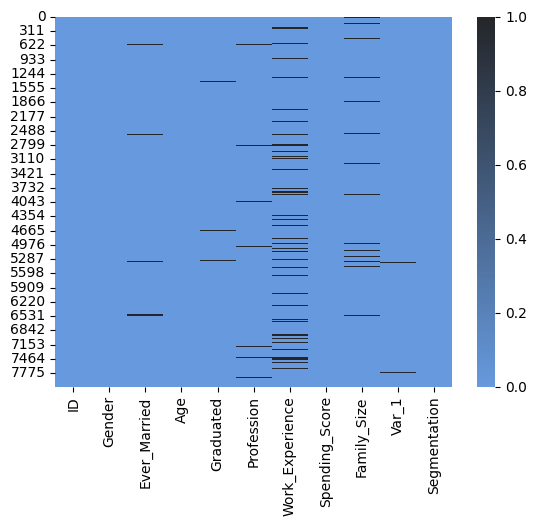

In [40]:
# Наличие null значений в датасете
sns.heatmap(df.isnull(), cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True))

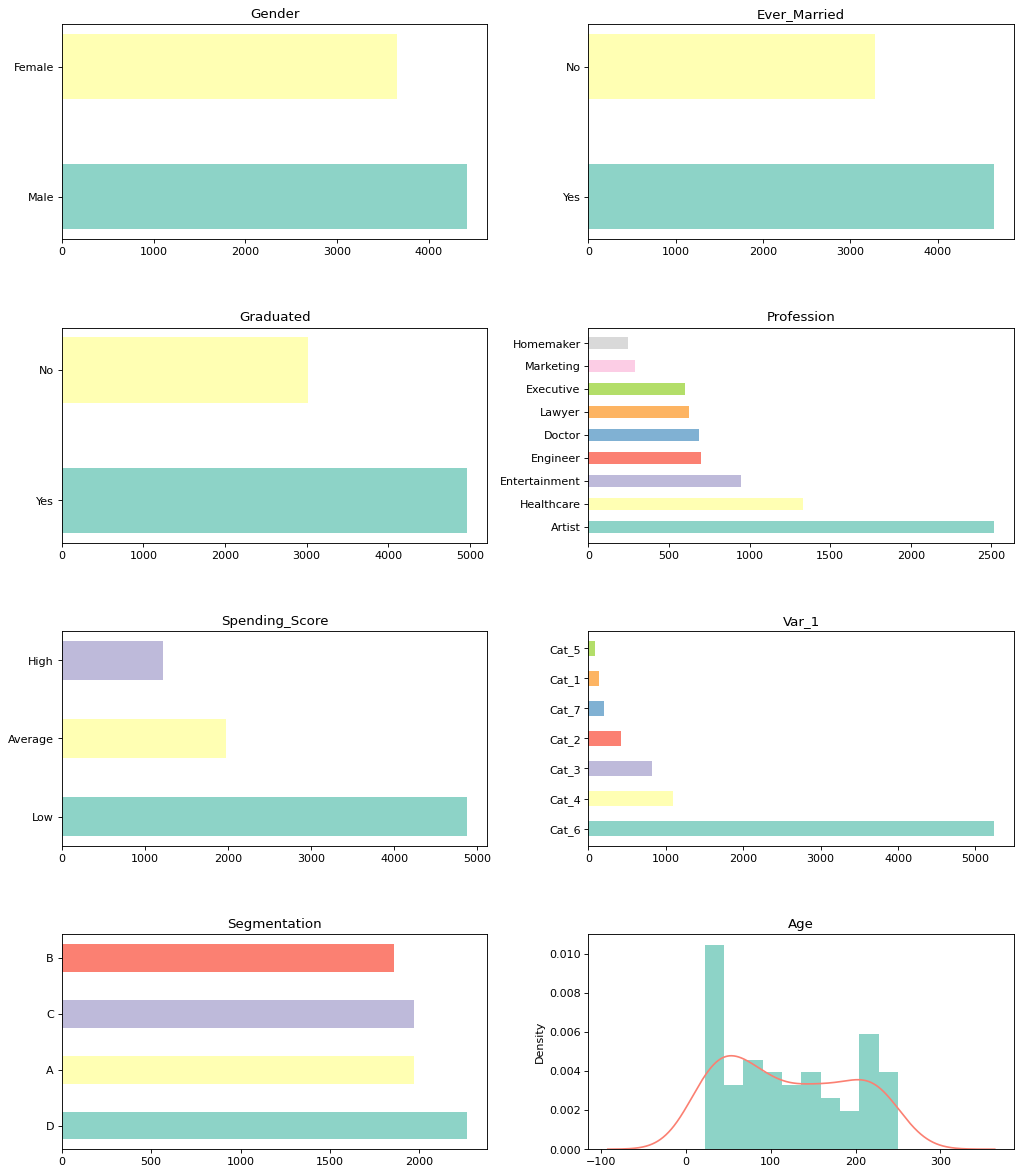

In [110]:
# Гистограммы, чтобы посмотреть распределение категориальных переменных
color_palette = sns.color_palette("Set3")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,16), dpi=80)
fig.tight_layout(pad=6.0)
for k in zip(axes.flat, df.select_dtypes(include='object').keys()):
    x = df[k[1]].value_counts()
    k[0].barh(x.index, x, height=0.5, color=color_palette, )
    k[0].set_title(k[1])
    
# График для целочисленной переменной Age
axes[-1,-1].set_title('Age')
df['Age'].value_counts().plot(kind='hist', density = True, ax=axes[3,1], color=color_palette[0])
df['Age'].value_counts().plot(kind='kde', ax=axes[3,1], color=color_palette[3])
plt.show()

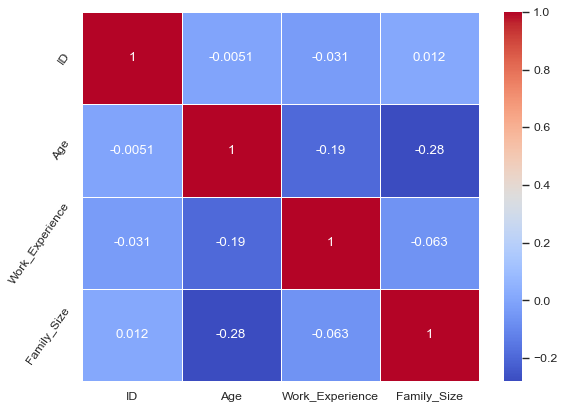

In [134]:
# График heatmap попарной корреляции всех числовых признаков
plt.figure(figsize=(8,6), dpi=80)
sns.heatmap(data = df.corr(numeric_only=True), cmap="coolwarm", annot=True, linewidth=0.7)
plt.yticks(rotation=55)
plt.show()

## 3 не очень хороших графика

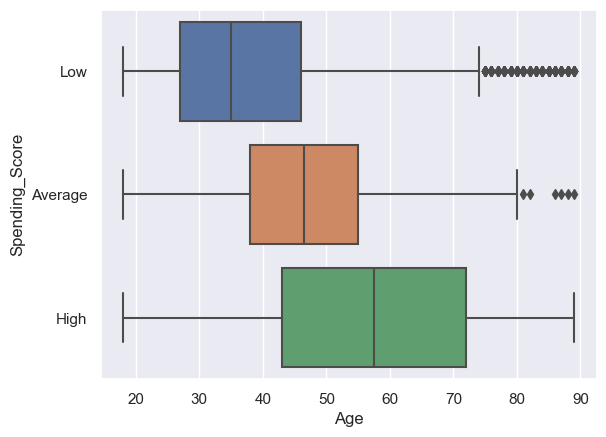

In [132]:
# Соотношение Graduated от
# Распределение возраста в зависимости от Spending_Score
plt.figure(figsize=(8,6), dpi=80)
sns.boxplot(x='Age', y='Spending_Score', data = df)
plt.show()

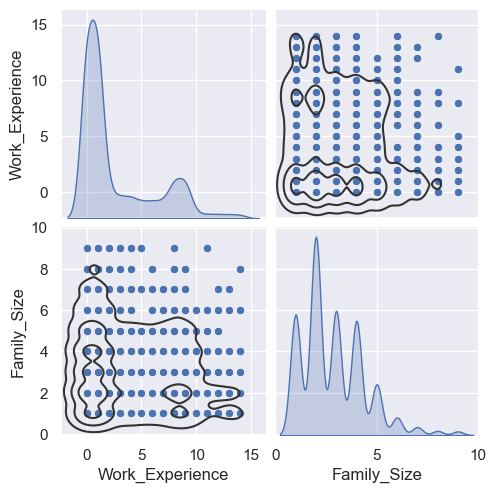

In [149]:
# Взаимосвязь двух переменных
g = sns.pairplot(df, vars=['Work_Experience', 'Family_Size'], diag_kind="kde")
g.map_offdiag(sns.kdeplot, levels=4, color=".2")

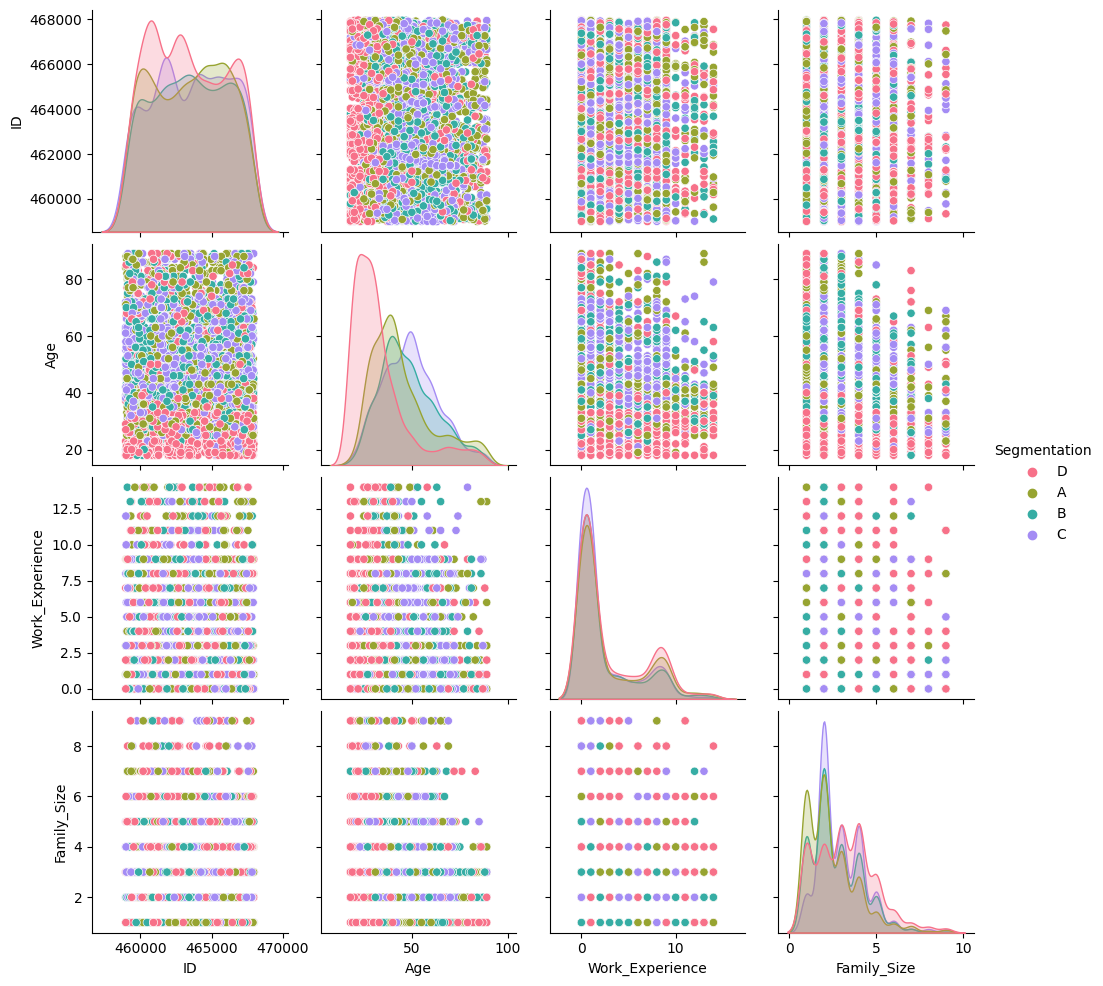

In [79]:
# График попарной корреляции всех категориальных признаков
sns.pairplot(df, hue='Segmentation', palette='husl')